In [136]:
%%html
<style>table {float:left}</style>
<style>img {float:left}</style>

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

**Task Description**

1. Organise the project structure, get data and run the notebook.
2. Experiment with various MLP architectures and size of its layers.
3. Experiment with dropout layers and their dropout rates.
4. Experiment with layer activation functions (e.g. sigmoid, tanh, elu or relu).
5. Experiment with different optimisers (e.g. SGD, RMSprop, Adam, Adamax, Nadam)
6. Report and tabulate your experimental results.
7. Save the IPYNB notebook, convert it to PDF (via HTML) and submit both for assessment.

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## Table of Content
   
1. [Notebook Preparation](#cell_Preparation)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Model Construction](#cell_model)

4. [Model Execution](#cell_execution)
 
5. [Experiments Report](#cell_report)



<a id = "cell_Preparation"></a>
## 1. Notebook Preparation

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras import metrics
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [77]:
#Mounting google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
energy_data = pd.read_csv('/content/drive/MyDrive/good_assignment/PartA-SmartHomeEnergyConsumption.csv')
print(energy_data.shape)
energy_data.head()

(29998, 18)


,gen [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,Total Consuption
0,0.003483,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,0.932833
1,0.003467,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,0.934333
2,0.003467,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,0.931817
3,0.003483,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,1.022050
4,0.003467,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,1.139400


In [140]:
#Data types
energy_data.dtypes

gen [kW]            float64
Dishwasher [kW]     float64
Furnace 1 [kW]      float64
Furnace 2 [kW]      float64
Home office [kW]    float64
Fridge [kW]         float64
Wine cellar [kW]    float64
Garage door [kW]    float64
Kitchen 12 [kW]     float64
Kitchen 14 [kW]     float64
Kitchen 38 [kW]     float64
Barn [kW]           float64
Well [kW]           float64
Microwave [kW]      float64
Living room [kW]    float64
Solar [kW]          float64
temperature         float64
Total Consuption    float64
dtype: object

In [141]:
#Summary
energy_data.describe()

,gen [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,Total Consuption
count,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000
mean,0.056453,0.038770,0.232167,0.240812,0.101068,0.056384,0.018790,0.013682,0.001403,0.008986,0.000010,0.065703,0.017443,0.009423,0.048360,0.056453,27.108708,1.079720
std,0.115127,0.212522,0.221758,0.252538,0.115567,0.072355,0.034726,0.009739,0.019662,0.084576,0.000010,0.150328,0.145153,0.080788,0.108222,0.115127,9.414269,0.685901
min,0.000000,0.000000,0.002433,0.002017,0.002467,0.000133,0.000217,0.000467,0.000017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.910000,0.000033
25%,0.003067,0.000017,0.021617,0.064600,0.042067,0.005000,0.006800,0.012450,0.000433,0.000050,0.000000,0.029033,0.001000,0.004000,0.001500,0.003067,20.260000,0.598583
50%,0.003350,0.000067,0.102017,0.070733,0.049433,0.005333,0.007100,0.012817,0.000633,0.000133,0.000017,0.030117,0.001000,0.004083,0.001600,0.003350,27.540000,0.956958
75%,0.032375,0.000233,0.479917,0.567029,0.108700,0.121400,0.007400,0.013050,0.000733,0.000300,0.000017,0.031650,0.001017,0.004200,0.001700,0.032375,34.690000,1.434775
max,0.554950,1.378650,1.915517,0.775417,0.913317,0.851267,0.229633,0.341417,0.906283,1.612117,0.000067,6.327833,1.614650,1.871750,0.348700,0.554950,55.880000,7.378917


In [142]:
#Correlation matrix
corr = energy_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,gen [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,Total Consuption
gen [kW],1.00,0.03,0.08,-0.17,-0.13,-0.05,-0.10,0.03,-0.00,-0.01,0.02,0.03,0.03,0.00,-0.02,1.00,-0.12,-0.27
Dishwasher [kW],0.03,1.00,-0.03,-0.03,0.06,0.06,-0.02,-0.02,-0.01,-0.01,0.00,0.01,0.01,-0.01,-0.00,0.03,-0.01,0.28
Furnace 1 [kW],0.08,-0.03,1.00,0.09,-0.13,-0.04,-0.01,-0.04,0.02,0.01,0.02,-0.00,0.00,-0.01,0.01,0.08,-0.17,0.29
Furnace 2 [kW],-0.17,-0.03,0.09,1.00,-0.02,-0.02,0.04,-0.02,-0.01,-0.01,0.17,-0.01,0.01,0.01,-0.05,-0.17,-0.11,0.46
Home office [kW],-0.13,0.06,-0.13,-0.02,1.00,0.05,0.03,-0.02,-0.01,-0.03,-0.02,-0.04,-0.01,-0.01,-0.01,-0.13,-0.11,0.17
Fridge [kW],-0.05,0.06,-0.04,-0.02,0.05,1.00,0.05,0.00,-0.01,-0.00,-0.01,-0.00,0.01,0.01,0.06,-0.05,0.03,0.22
Wine cellar [kW],-0.10,-0.02,-0.01,0.04,0.03,0.05,1.00,-0.02,-0.01,0.04,0.00,0.06,-0.00,0.03,0.03,-0.10,0.02,0.13
Garage door [kW],0.03,-0.02,-0.04,-0.02,-0.02,0.00,-0.02,1.00,0.01,-0.00,0.00,0.04,-0.00,-0.00,-0.00,0.03,0.02,-0.02
Kitchen 12 [kW],-0.00,-0.01,0.02,-0.01,-0.01,-0.01,-0.01,0.01,1.00,0.00,0.01,-0.01,0.01,0.01,0.09,-0.00,-0.02,0.04
Kitchen 14 [kW],-0.01,-0.01,0.01,-0.01,-0.03,-0.00,0.04,-0.00,0.00,1.00,0.10,-0.02,0.05,0.01,0.11,-0.01,0.01,0.14


<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

In [79]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
  
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

*Split data for training and validation (e.g. 0.7/0.3).*

In [80]:
#Splitting data: As data is not a timeseries, we have shuffle the splits
X_train, X_test, y_train, y_test = train_test_split(energy_data.iloc[:,:-1], \
                                                    energy_data.iloc[:,-1:], test_size=0.30, random_state=42,shuffle=True)
print('Shape of:\nX_Train:{}\nY_train:{}\nX_test:{}\nY_test:{}' \
     .format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

Shape of:
X_Train:(20998, 17)
Y_train:(20998, 1)
X_test:(9000, 17)
Y_test:(9000, 1)


<a id = "cell_model"></a>
## 3. Model Construction

*Provide code to create your deep learning models in this section. Create at least 5 Sequential models with varied settings (e.g. layers, types of layer,  number of nodes, activation functions, optimizers). Note: Your models should not be exactly the same as the models, which were already included in the weekly practical contents.*

*For all models, use mean_squared_error as the loss function, and set the number of epochs to be 500.*

*Once the models are defined, create executable models and visualize their architecture. Hint: use model.summary() function*.

In [81]:
#Model 1
def mod1():
    mod1 = Sequential()
    mod1.add(Dense(300, activation='relu', kernel_initializer='he_uniform',input_shape=(X_train.shape[1],)))
    mod1.add(Dense(200, activation='relu'))    
    mod1.add(Dense(y_train.shape[1]))
    mod1.compile(loss='mse',optimizer=optimizers.RMSprop(learning_rate=0.001),
                      metrics=['mae'])
    return mod1
model_1 = mod1()
model_1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 300)               5400      
_________________________________________________________________
dense_73 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 201       
Total params: 65,801
Trainable params: 65,801
Non-trainable params: 0
_________________________________________________________________


In [112]:
#Model 2
def mod2():
    mod2 = Sequential()
    mod2.add(Dense(150, activation='relu', kernel_initializer='he_uniform',input_shape=(X_train.shape[1],)))
    mod2.add(Dense(100, activation='relu'))      
    mod2.add(Dense(y_train.shape[1]))
    mod2.compile(loss='mse',optimizer=optimizers.RMSprop(learning_rate=0.001),
                      metrics=['mae'])
    return mod2
model_2 = mod2()
model_2.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 150)               2700      
_________________________________________________________________
dense_91 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 101       
Total params: 17,901
Trainable params: 17,901
Non-trainable params: 0
_________________________________________________________________


In [83]:
#Model 3
def mod3():
    mod3 = Sequential()
    mod3.add(Dense(150, activation='relu', kernel_initializer='he_uniform',input_shape=(X_train.shape[1],)))
    mod3.add(Dense(100, activation='relu'))
    mod3.add(Dense(50, activation='relu'))      
    mod3.add(Dense(y_train.shape[1]))
    mod3.compile(loss='mse',optimizer=optimizers.RMSprop(learning_rate=0.001),
                      metrics=['mae'])
    return mod3
model_3 = mod3()
model_3.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 150)               2700      
_________________________________________________________________
dense_79 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_80 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 51        
Total params: 22,901
Trainable params: 22,901
Non-trainable params: 0
_________________________________________________________________


In [84]:
#Model 4
def mod4():
    mod4 = Sequential()
    mod4.add(Dense(150, activation='relu', kernel_initializer='he_uniform',input_shape=(X_train.shape[1],)))
    mod4.add(Dense(100, activation='relu'))
    mod4.add(Dense(50, activation='relu'))         
    mod4.add(Dense(y_train.shape[1]))
    mod4.compile(loss='mse',optimizer=optimizers.Adamax(learning_rate=0.001),
                      metrics=['mae'])
    return mod4
model_4 = mod4()
model_4.summary()


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 150)               2700      
_________________________________________________________________
dense_83 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_84 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 51        
Total params: 22,901
Trainable params: 22,901
Non-trainable params: 0
_________________________________________________________________


In [85]:
#Model 5
def mod5():
    mod5 = Sequential()
    mod5.add(Dense(150, activation='relu', kernel_initializer='he_uniform',input_shape=(X_train.shape[1],)))
    mod5.add(Dense(100, activation='relu'))
    mod5.add(Dense(50, activation='relu'))                
    mod5.add(Dense(y_train.shape[1]))
    mod5.compile(loss='mse',optimizer=optimizers.Adam(learning_rate=0.001),
                      metrics=['mae'])
    

    return mod5
model_5 = mod5()
model_5.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 150)               2700      
_________________________________________________________________
dense_87 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_88 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 51        
Total params: 22,901
Trainable params: 22,901
Non-trainable params: 0
_________________________________________________________________


<a id = "cell_execution"></a>
## 4. Model Execution

*This section is to provide code to fit the models. Record and plot the history of training and validation. Report the performance of the trained model on the both the training and the test sets.*<br>

**Model 1**

In [86]:
#Fitting NN model
history = model_1.fit(X_train,y_train,epochs=150, validation_split = 0.30,
                        batch_size=90,shuffle=True,verbose=True)

Epoch 1/150
164/164 [==============================] - 1s 5ms/step - loss: 16.7592 - mae: 3.2379 - val_loss: 8.4540 - val_mae: 2.6620
Epoch 2/150
164/164 [==============================] - 1s 4ms/step - loss: 6.5953 - mae: 2.2209 - val_loss: 5.3725 - val_mae: 2.1391
Epoch 3/150
164/164 [==============================] - 1s 4ms/step - loss: 3.1408 - mae: 1.4623 - val_loss: 0.2826 - val_mae: 0.3807
Epoch 4/150
164/164 [==============================] - 1s 4ms/step - loss: 1.7751 - mae: 1.0763 - val_loss: 1.1698 - val_mae: 0.9804
Epoch 5/150
164/164 [==============================] - 1s 4ms/step - loss: 1.1183 - mae: 0.8516 - val_loss: 0.4031 - val_mae: 0.5299
Epoch 6/150
164/164 [==============================] - 1s 4ms/step - loss: 0.5523 - mae: 0.5785 - val_loss: 0.3993 - val_mae: 0.5450
Epoch 7/150
164/164 [==============================] - 1s 4ms/step - loss: 0.3925 - mae: 0.4593 - val_loss: 0.2569 - val_mae: 0.3142
Epoch 8/150
164/164 [==============================] - 1s 4ms/step -

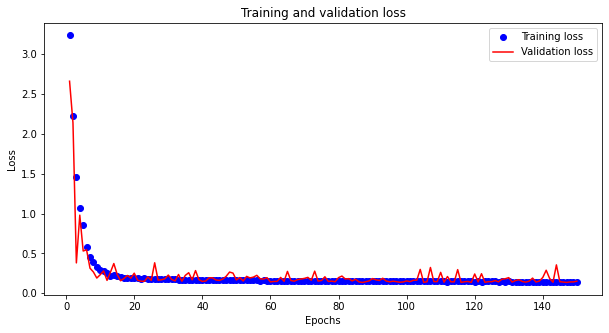

In [87]:
#Evaluating model over training and validation dataset
loss = history.history['mae']
val_loss = history.history['val_mae']


#Plotting training and validation loss with number of epochs
plt.figure(figsize=(10, 5))
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [88]:
#Training and test data prediction
model_1_train = model_1.predict(X_train)
model_1_test = model_1.predict(X_test)

In [89]:
#Train and test MAE
train_mae_1 = round(mean_absolute_error(y_train,model_1_train),3)
test_mae_1 = round(mean_absolute_error(y_test,model_1_test),3)
print("Train MAE:{}\nTest MAE:{}\n".format(train_mae_1,test_mae_1))

Train MAE:0.143
Test MAE:0.145



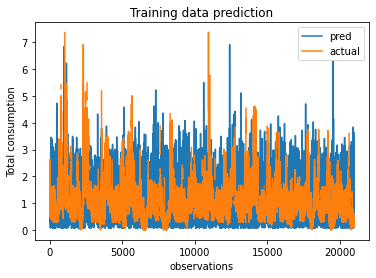

In [90]:
#Plotting training prediction
pred_train_1 = pd.DataFrame(model_1_train,columns=['pred'])
pred_train_1['actual'] = y_train

pred_train_1.plot(xlabel='observations',ylabel='Total consumption')
plt.title('Training data prediction')
plt.show()

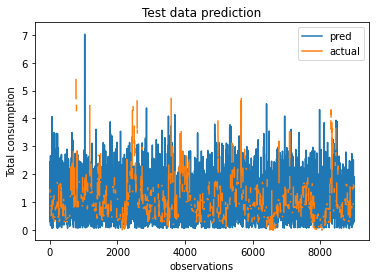

In [91]:
#Plotting test data prediction
pred_test_1 = pd.DataFrame(model_1_test,columns=['pred'])
pred_test_1['actual'] = y_test

pred_test_1.plot(xlabel='observations',ylabel='Total consumption')
plt.title('Test data prediction')
plt.show()

**Model 2**

In [113]:
#Fitting NN model
history_2 = model_2.fit(X_train,y_train,epochs=150, validation_split = 0.30,
                        batch_size=90,shuffle=True,verbose=True)

Epoch 1/150
164/164 [==============================] - 1s 4ms/step - loss: 3.9740 - mae: 1.5335 - val_loss: 0.7699 - val_mae: 0.7012
Epoch 2/150
164/164 [==============================] - 0s 2ms/step - loss: 2.1912 - mae: 1.1866 - val_loss: 6.0790 - val_mae: 2.3182
Epoch 3/150
164/164 [==============================] - 0s 3ms/step - loss: 1.6497 - mae: 1.0357 - val_loss: 0.6424 - val_mae: 0.6887
Epoch 4/150
164/164 [==============================] - 0s 3ms/step - loss: 1.1831 - mae: 0.8974 - val_loss: 1.3217 - val_mae: 1.0531
Epoch 5/150
164/164 [==============================] - 0s 2ms/step - loss: 0.9205 - mae: 0.8075 - val_loss: 0.4878 - val_mae: 0.6030
Epoch 6/150
164/164 [==============================] - 0s 3ms/step - loss: 0.6705 - mae: 0.6887 - val_loss: 1.2078 - val_mae: 1.0168
Epoch 7/150
164/164 [==============================] - 0s 3ms/step - loss: 0.5013 - mae: 0.5281 - val_loss: 0.8459 - val_mae: 0.7964
Epoch 8/150
164/164 [==============================] - 0s 3ms/step - 

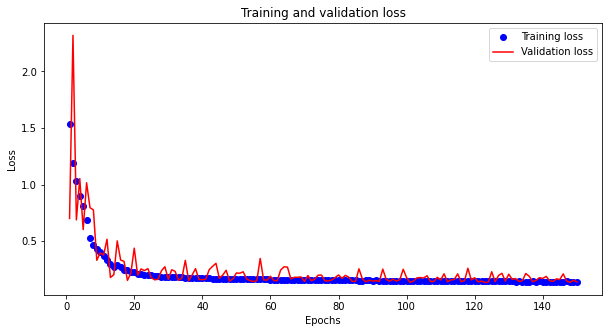

In [114]:
#Evaluating model over training and validation dataset
loss_2 = history_2.history['mae']
val_loss_2 = history_2.history['val_mae']


#Plotting training and validation loss with number of epochs
plt.figure(figsize=(10, 5))
epochs_2 = range(1, len(loss_2) + 1)
plt.plot(epochs_2, loss_2, 'bo', label='Training loss')
plt.plot(epochs_2, val_loss_2, 'b', label='Validation loss', color = 'red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [115]:
#Training and test data prediction
model_2_train = model_2.predict(X_train)
model_2_test = model_2.predict(X_test)

In [116]:
#Train and test MAE
train_mae_2 = round(mean_absolute_error(y_train,model_2_train),3)
test_mae_2 = round(mean_absolute_error(y_test,model_2_test),3)
print("Train MAE:{}\nTest MAE:{}\n".format(train_mae_2,test_mae_2))

Train MAE:0.133
Test MAE:0.135



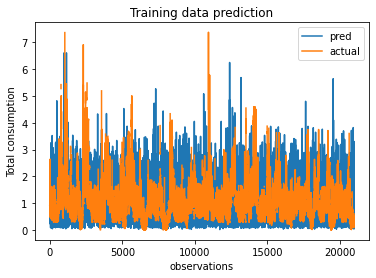

In [117]:
#Plotting training prediction
pred_train_2 = pd.DataFrame(model_2_train,columns=['pred'])
pred_train_2['actual'] = y_train

pred_train_2.plot(xlabel='observations',ylabel='Total consumption')
plt.title('Training data prediction')
plt.show()

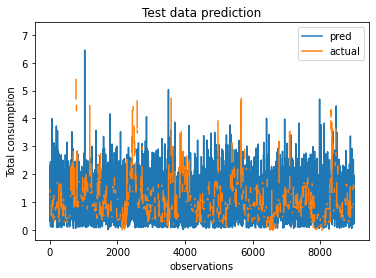

In [118]:
#Plotting test data prediction
pred_test_2 = pd.DataFrame(model_2_test,columns=['pred'])
pred_test_2['actual'] = y_test

pred_test_2.plot(xlabel='observations',ylabel='Total consumption')
plt.title('Test data prediction')
plt.show()

**Model 3**

In [99]:
#Fitting NN model
history_3 = model_3.fit(X_train,y_train,epochs=150, validation_split = 0.30,
                        batch_size=90,shuffle=True,verbose=True)

Epoch 1/150
164/164 [==============================] - 1s 3ms/step - loss: 5.4174 - mae: 1.7588 - val_loss: 1.8000 - val_mae: 1.1566
Epoch 2/150
164/164 [==============================] - 0s 3ms/step - loss: 1.5523 - mae: 1.0097 - val_loss: 0.3942 - val_mae: 0.4108
Epoch 3/150
164/164 [==============================] - 0s 3ms/step - loss: 0.5369 - mae: 0.5456 - val_loss: 0.3791 - val_mae: 0.4018
Epoch 4/150
164/164 [==============================] - 0s 2ms/step - loss: 0.3497 - mae: 0.4191 - val_loss: 0.2559 - val_mae: 0.3030
Epoch 5/150
164/164 [==============================] - 0s 3ms/step - loss: 0.2549 - mae: 0.3415 - val_loss: 0.2062 - val_mae: 0.2394
Epoch 6/150
164/164 [==============================] - 0s 3ms/step - loss: 0.2101 - mae: 0.3005 - val_loss: 0.1470 - val_mae: 0.1946
Epoch 7/150
164/164 [==============================] - 0s 3ms/step - loss: 0.1749 - mae: 0.2615 - val_loss: 0.1467 - val_mae: 0.2228
Epoch 8/150
164/164 [==============================] - 0s 3ms/step - 

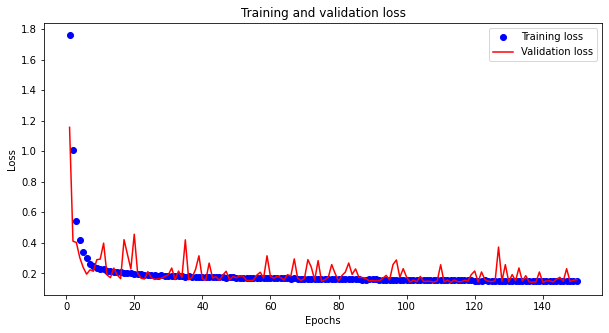

In [100]:
#Evaluating model over training and validation dataset
loss_3 = history_3.history['mae']
val_loss_3 = history_3.history['val_mae']


#Plotting training and validation loss with number of epochs
plt.figure(figsize=(10, 5))
epochs_3 = range(1, len(loss_3) + 1)
plt.plot(epochs_3, loss_3, 'bo', label='Training loss')
plt.plot(epochs_3, val_loss_3, 'b', label='Validation loss', color = 'red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [101]:
#Training and test data prediction
model_3_train = model_3.predict(X_train)
model_3_test = model_3.predict(X_test)

In [102]:
#Train and test MAE
train_mae_3 = round(mean_absolute_error(y_train,model_3_train),3)
test_mae_3 = round(mean_absolute_error(y_test,model_3_test),3)
print("Train MAE:{}\nTest MAE:{}\n".format(train_mae_3,test_mae_3))

Train MAE:0.151
Test MAE:0.151



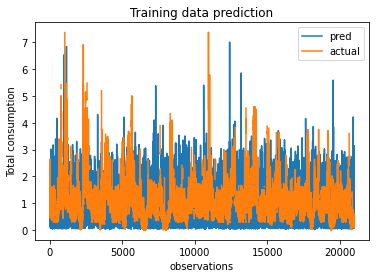

In [103]:
#Plotting training prediction
pred_train_3 = pd.DataFrame(model_3_train,columns=['pred'])
pred_train_3['actual'] = y_train

pred_train_3.plot(xlabel='observations',ylabel='Total consumption')
plt.title('Training data prediction')
plt.show()

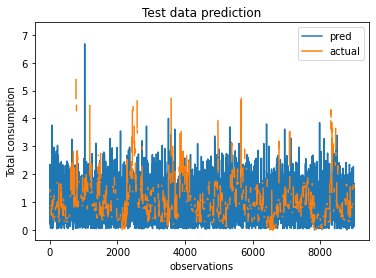

In [104]:
#Plotting test data prediction
pred_test_3 = pd.DataFrame(model_3_test,columns=['pred'])
pred_test_3['actual'] = y_test

pred_test_3.plot(xlabel='observations',ylabel='Total consumption')
plt.title('Test data prediction')
plt.show()

**Model 4**

In [105]:
#Fitting NN model
history_4 = model_4.fit(X_train,y_train,epochs=150, validation_split = 0.30,
                        batch_size=90,shuffle=True,verbose=True)

Epoch 1/150
164/164 [==============================] - 1s 3ms/step - loss: 2.3257 - mae: 0.8482 - val_loss: 0.5489 - val_mae: 0.5433
Epoch 2/150
164/164 [==============================] - 0s 3ms/step - loss: 0.4553 - mae: 0.4922 - val_loss: 0.3958 - val_mae: 0.4485
Epoch 3/150
164/164 [==============================] - 0s 3ms/step - loss: 0.3059 - mae: 0.3877 - val_loss: 0.2599 - val_mae: 0.3371
Epoch 4/150
164/164 [==============================] - 0s 3ms/step - loss: 0.2011 - mae: 0.2941 - val_loss: 0.1881 - val_mae: 0.2625
Epoch 5/150
164/164 [==============================] - 0s 2ms/step - loss: 0.1443 - mae: 0.2143 - val_loss: 0.1498 - val_mae: 0.2115
Epoch 6/150
164/164 [==============================] - 0s 2ms/step - loss: 0.1302 - mae: 0.1931 - val_loss: 0.1487 - val_mae: 0.1717
Epoch 7/150
164/164 [==============================] - 0s 3ms/step - loss: 0.1259 - mae: 0.1876 - val_loss: 0.1504 - val_mae: 0.1674
Epoch 8/150
164/164 [==============================] - 0s 3ms/step - 

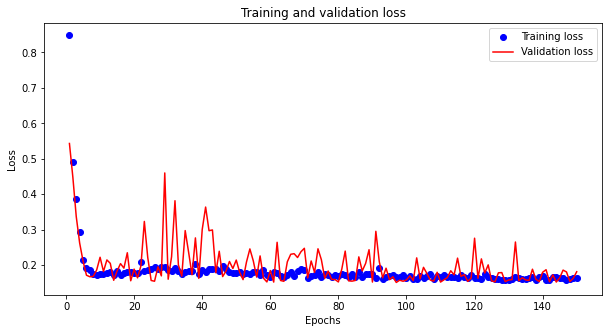

In [106]:
#Evaluating model over training and validation dataset
loss_4 = history_4.history['mae']
val_loss_4 = history_4.history['val_mae']

#Plotting training and validation loss with number of epochs
plt.figure(figsize=(10, 5))
epochs_4 = range(1, len(loss_4) + 1)
plt.plot(epochs_4, loss_4, 'bo', label='Training loss')
plt.plot(epochs_4, val_loss_4, 'b', label='Validation loss', color = 'red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [107]:
#Training and test data prediction
model_4_train = model_4.predict(X_train)
model_4_test = model_4.predict(X_test)

In [108]:
#Train and test MAE
train_mae_4 = round(mean_absolute_error(y_train,model_4_train),3)
test_mae_4 = round(mean_absolute_error(y_test,model_4_test),3)
print("Train MAE:{}\nTest MAE:{}\n".format(train_mae_4,test_mae_4))

Train MAE:0.174
Test MAE:0.173



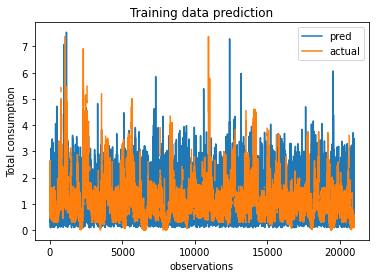

In [109]:
#Plotting training prediction
pred_train_4 = pd.DataFrame(model_4_train,columns=['pred'])
pred_train_4['actual'] = y_train

pred_train_4.plot(xlabel='observations',ylabel='Total consumption')
plt.title('Training data prediction')
plt.show()

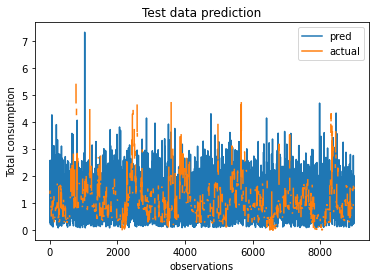

In [110]:
#Plotting test data prediction
pred_test_4 = pd.DataFrame(model_4_test,columns=['pred'])
pred_test_4['actual'] = y_test

pred_test_4.plot(xlabel='observations',ylabel='Total consumption')
plt.title('Test data prediction')
plt.show()

**Model 5**

In [65]:
#Fitting NN model
history_5 = model_5.fit(X_train,y_train,epochs=150, validation_split = 0.25,
                        batch_size=50,shuffle=True,verbose=True,)

Epoch 1/150
315/315 [==============================] - 1s 3ms/step - loss: 0.6327 - mae: 0.4770 - val_loss: 0.1898 - val_mae: 0.2036
Epoch 2/150
315/315 [==============================] - 1s 3ms/step - loss: 0.1474 - mae: 0.2155 - val_loss: 0.1608 - val_mae: 0.1779
Epoch 3/150
315/315 [==============================] - 1s 3ms/step - loss: 0.1352 - mae: 0.2019 - val_loss: 0.1692 - val_mae: 0.2826
Epoch 4/150
315/315 [==============================] - 1s 2ms/step - loss: 0.1324 - mae: 0.2012 - val_loss: 0.1584 - val_mae: 0.1911
Epoch 5/150
315/315 [==============================] - 1s 2ms/step - loss: 0.1360 - mae: 0.2066 - val_loss: 0.1386 - val_mae: 0.1943
Epoch 6/150
315/315 [==============================] - 1s 2ms/step - loss: 0.1317 - mae: 0.1982 - val_loss: 0.1863 - val_mae: 0.3185
Epoch 7/150
315/315 [==============================] - 1s 3ms/step - loss: 0.1250 - mae: 0.1865 - val_loss: 0.1477 - val_mae: 0.2342
Epoch 8/150
315/315 [==============================] - 1s 2ms/step - 

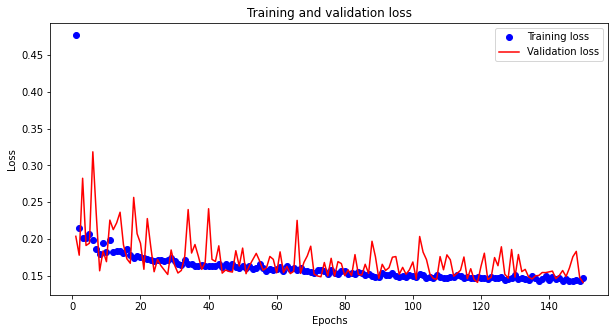

In [66]:
#Evaluating model over training and validation dataset
loss_5 = history_5.history['mae']
val_loss_5 = history_5.history['val_mae']

#Plotting training and validation loss with number of epochs
plt.figure(figsize=(10, 5))
epochs_5 = range(1, len(loss_5) + 1)
plt.plot(epochs_5, loss_5, 'bo', label='Training loss')
plt.plot(epochs_5, val_loss_5, 'b', label='Validation loss', color = 'red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [67]:
#Training and test data prediction
model_5_train = model_5.predict(X_train)
model_5_test = model_5.predict(X_test)

In [68]:
#Train and test MAE
train_mae_5 = round(mean_absolute_error(y_train,model_5_train),3)
test_mae_5 = round(mean_absolute_error(y_test,model_5_test),3)
print("Train MAE:{}\nTest MAE:{}\n".format(train_mae_5,test_mae_5))

Train MAE:0.132
Test MAE:0.131



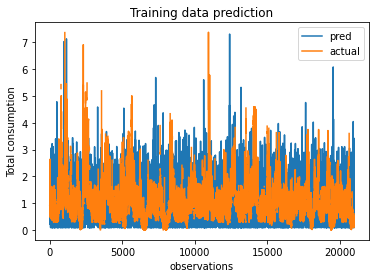

In [69]:
#Plotting training prediction
pred_train_5 = pd.DataFrame(model_5_train,columns=['pred'])
pred_train_5['actual'] = y_train

pred_train_5.plot(xlabel='observations',ylabel='Total consumption')
plt.title('Training data prediction')
plt.show()

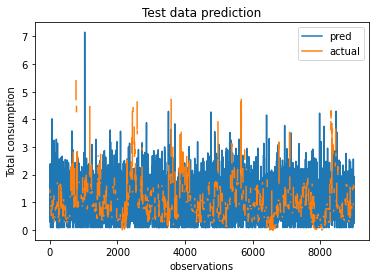

In [70]:
#Plotting test data prediction
pred_test_5 = pd.DataFrame(model_5_test,columns=['pred'])
pred_test_5['actual'] = y_test

pred_test_5.plot(xlabel='observations',ylabel='Total consumption')
plt.title('Test data prediction')
plt.show()

<a id = "cell_report"></a>
## 5. Experiments Report

*Provide a summary of experimental results in the table below.*


| Model# |  Train MAE | Test MAE | #Parameters | #Hidden Layers | #Neurons-HidLay1 | #Neurons-HidLay2 | #Neurons-HidLay3 | Optimizer |
| :-: | -: | -: | -: | -: | -: | -: | -: | -: |
| 1 | 0.150 | 0.149  | 65,801  | 2  | 300  | 200  | -  | RMSprop   | -  |
| 2 | 0.133 | 0.135  | 17,901  | 2  | 150  | 100  | -  | RMSprop  | LR reducer |
| 3 | 0.145 | 0.143  | 22,901  | 3  | 150  | 100  | 50  | RMSprop  | -  |
| 4 | 0.258 | 0.256  | 22,901  | 3  | 150  | 100  | 50  | Adamax  |  - |
| 5 | 0.132 | 0.131  | 22,901  | 3  | 150  | 100  | 50  | Adam  |  - |

<br>

*Model 1 has been considered as base model with two hidden layers, 65,801 parameters, RMSprop as optimizer, learning rate 0.001 and 150 epochs. This model converged by 20 epochs and provided good fit with MAE of 0.150 and 0.149 on training and test data set. Rest of the models were created by changing one or more hyper parameters.
In Model 2 strength of the model was reduced to 17,901 parameters and by adding LR reducer. This model provided good fit with MAE of 0.133 and 0.135 on training and test data set. In rest of the models, third layer was added to increase parameters to 22,901 with optimizers,'RMSprop','Adamax', 'Adam'. Model 4 with Adamax optimizer had highest MAE, whereas model 5 with Adam optimizer was best model.*
<br>